In [1]:
# подготовка
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:

from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

In [3]:
dataset



DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

In [6]:
# 1 Баланс
# Для начала проверим, сбалансирован ли наш датасет.


# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels
# пустые переменные
label_counts = {label: {'train': 0, 'validation': 0, 'test': 0} for label in unique_labels}

# считаем метки в обучающей выборке
for i in dataset['train']:
    label_counts[i['sentiment']]['train'] += 1

# в проверочной
for i in dataset['validation']:
    label_counts[i['sentiment']]['validation'] += 1

# в тестовой
for i in dataset['test']:
    label_counts[i['sentiment']]['test'] += 1

for label, counts in label_counts.items():
    print(f"Label: {label}")
    print(f"Train: {counts['train']}")
    print(f"Validation: {counts['validation']}")
    print(f"Test: {counts['test']}")
    print()

Label: neutral
Train: 11649
Validation: 1928
Test: 1930

Label: negative
Train: 9105
Validation: 1517
Test: 1546

Label: positive
Train: 10478
Validation: 1760
Test: 1730



In [7]:
# считаем элементы
total_train = sum(label_counts[label]['train'] for label in unique_labels)
total_validation = sum(label_counts[label]['validation'] for label in unique_labels)
total_test = sum(label_counts[label]['test'] for label in unique_labels)

# находим процентное соотношения для каждого класса по выборкам
for label, counts in label_counts.items():
    train_percentage = (counts['train'] / total_train) * 100
    validation_percentage = (counts['validation'] / total_validation) * 100
    test_percentage = (counts['test'] / total_test) * 100

    print(f"Label: {label}")
    print(f"Train Percentage: {train_percentage:.2f}%")
    print(f"Validation Percentage: {validation_percentage:.2f}%")
    print(f"Test Percentage: {test_percentage:.2f}%")
    print()

Label: neutral
Train Percentage: 37.30%
Validation Percentage: 37.04%
Test Percentage: 37.07%

Label: negative
Train Percentage: 29.15%
Validation Percentage: 29.15%
Test Percentage: 29.70%

Label: positive
Train Percentage: 33.55%
Validation Percentage: 33.81%
Test Percentage: 33.23%



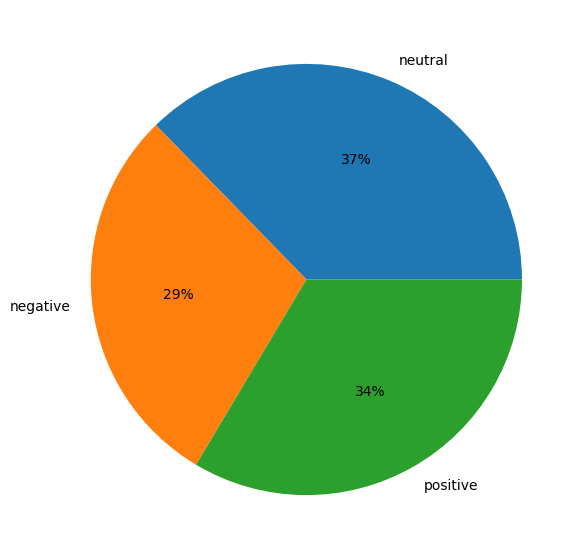

In [8]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = list(unique_labels)
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [label_counts[label]['train'] / total_train * 100 for label in unique_labels]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()


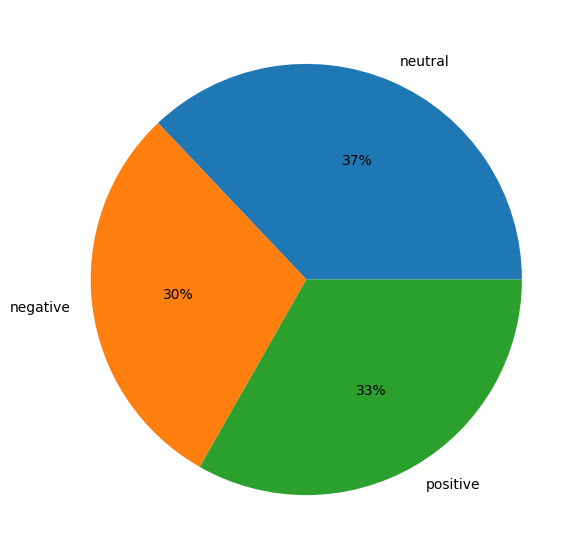

In [10]:
# Тестовая выборка
data = [label_counts[label]['test'] / total_test * 100 for label in unique_labels]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
plt.show()


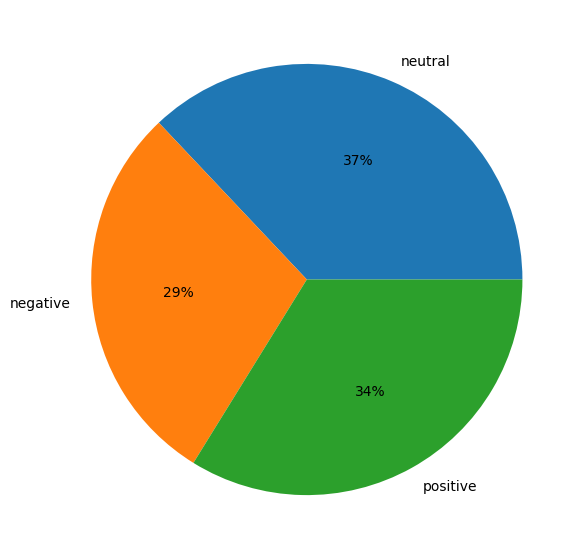

In [11]:
# Валидационная (проверочная) выборка
data = [label_counts[label]['validation'] / total_validation * 100 for label in unique_labels]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
plt.show()

In [12]:
# 2 обработка естественного языка
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [13]:

# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [14]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP


Cooking microwave pizzas, yummy

In [15]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [16]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [17]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [18]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)


NN
NN
NNS
,
JJ


In [19]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [20]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


In [33]:
# задача
#  1выводим первые 5 текстов из тестового датасета
test_texts = [i['text'] for i in dataset['test']]
print(test_texts[:5])

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


In [34]:
# 2 Создадим список токенов для каждого текста с помощью SpaCy
nlp = spacy.load('en_core_web_sm')

# делаем список
test_tokens = [nlp(text) for text in test_texts[:100]]

for i, tokens in enumerate(test_tokens[:5]):
    print(f"Text {i+1}:")
    print([token.text for token in tokens])
    print()

Text 1:
['getting', 'cds', 'ready', 'for', 'tour']

Text 2:
[' ', 'MC', ',', 'happy', 'mother`s', 'day', 'to', 'your', 'mom', ';)', '..', 'love', 'yah']

Text 3:
['A', 'year', 'from', 'now', 'is', 'graduation', '....', 'i', 'am', 'pretty', 'sure', 'i`m', 'not', 'ready', 'for', 'it', '!', '?', '!', '?', '!', '?']

Text 4:
[' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me']

Text 5:
['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']



In [35]:
# 3 частеречная разметка токенов в текстах
test_pos = [[token.pos_ for token in tokens] for tokens in test_tokens]

for i, (tokens, pos) in enumerate(zip(test_tokens[:5], test_pos[:5])):
    print(f"Text {i+1}:")
    print("Tokens:", [token.text for token in tokens])
    print("POS:", pos)
    print()

Text 1:
Tokens: ['getting', 'cds', 'ready', 'for', 'tour']
POS: ['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN']

Text 2:
Tokens: [' ', 'MC', ',', 'happy', 'mother`s', 'day', 'to', 'your', 'mom', ';)', '..', 'love', 'yah']
POS: ['SPACE', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'PUNCT', 'NOUN', 'NOUN']

Text 3:
Tokens: ['A', 'year', 'from', 'now', 'is', 'graduation', '....', 'i', 'am', 'pretty', 'sure', 'i`m', 'not', 'ready', 'for', 'it', '!', '?', '!', '?', '!', '?']
POS: ['DET', 'NOUN', 'ADP', 'ADV', 'AUX', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'ADJ', 'PROPN', 'PART', 'ADJ', 'ADP', 'PRON', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT']

Text 4:
Tokens: [' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me']
POS: ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON']

Text 5:
Tokens: ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']
POS: ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']



In [37]:
# 4 проверка точности разметки?
for text_index in range(5):
    print(f"Text {text_index + 1}:")
    for token_index in range(len(test_tokens[text_index])):
        token = test_tokens[text_index][token_index]
        pos = test_pos[text_index][token_index]
        print(f"{token.text} - {pos}")
    print()

Text 1:
getting - VERB
cds - NOUN
ready - ADJ
for - ADP
tour - NOUN

Text 2:
  - SPACE
MC - PROPN
, - PUNCT
happy - ADJ
mother`s - PROPN
day - NOUN
to - ADP
your - PRON
mom - NOUN
;) - PUNCT
.. - PUNCT
love - NOUN
yah - NOUN

Text 3:
A - DET
year - NOUN
from - ADP
now - ADV
is - AUX
graduation - NOUN
.... - PUNCT
i - PRON
am - AUX
pretty - ADV
sure - ADJ
i`m - PROPN
not - PART
ready - ADJ
for - ADP
it - PRON
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT
! - PUNCT
? - PUNCT

Text 4:
  - SPACE
because - SCONJ
you - PRON
had - VERB
chips - NOUN
and - CCONJ
sale - NOUN
w/o - ADP
me - PRON

Text 5:
Great - ADJ
for - ADP
organising - VERB
my - PRON
work - NOUN
life - NOUN
balance - NOUN



In [38]:
# 5 разметка именнованных сущностей
# выбираем нужные нам тексты
selected_texts = test_texts[6:19]

for text in selected_texts:
    doc = nlp(text)
    # выводим им сущности и их лейблы
    print([(ent.text, ent.label_) for ent in doc.ents])
    print()

[]

[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]

[('first', 'ORDINAL')]

[('today', 'DATE'), ('i`m', 'NORP')]

[]

[('Audi', 'ORG')]

[]

[('REALLY', 'GPE')]

[('i`m', 'NORP')]

[]

[]

[('TY', 'ORG')]

[('recent years', 'DATE')]

